In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/heart-attack/Medicaldataset.csv')

In [3]:
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


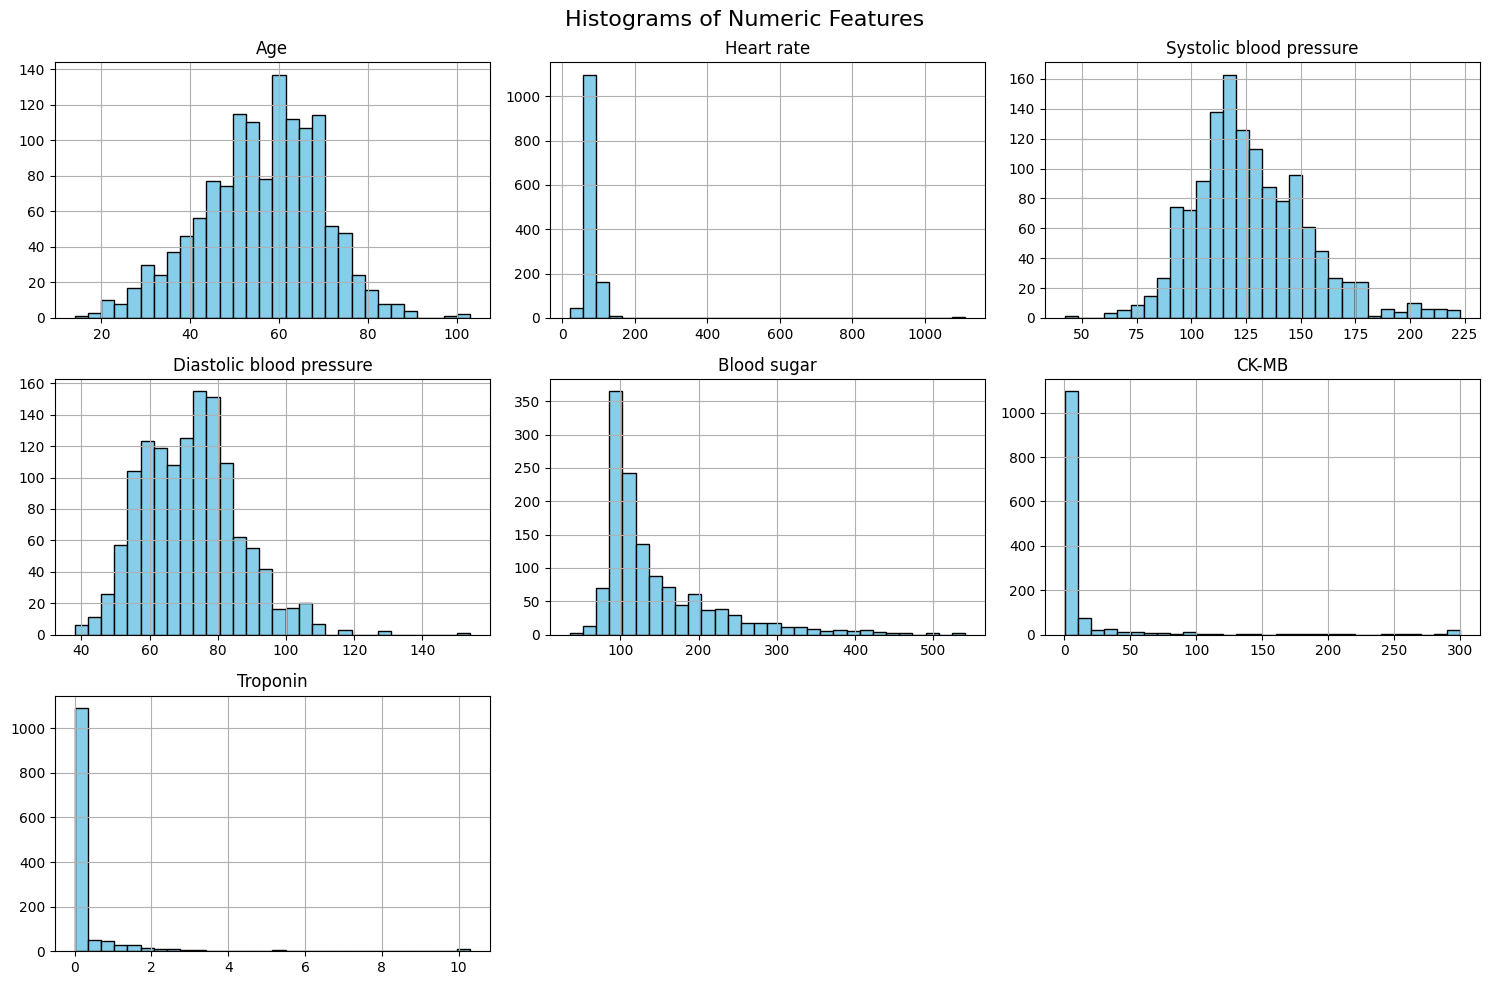

In [5]:
numeric_cols = df.drop(columns=['Result','Gender']).columns
df[numeric_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()


In [6]:
# Describe numeric features
print(df.describe())

               Age       Gender   Heart rate  Systolic blood pressure  \
count  1319.000000  1319.000000  1319.000000              1319.000000   
mean     56.191812     0.659591    78.336619               127.170584   
std      13.647315     0.474027    51.630270                26.122720   
min      14.000000     0.000000    20.000000                42.000000   
25%      47.000000     0.000000    64.000000               110.000000   
50%      58.000000     1.000000    74.000000               124.000000   
75%      65.000000     1.000000    85.000000               143.000000   
max     103.000000     1.000000  1111.000000               223.000000   

       Diastolic blood pressure  Blood sugar        CK-MB     Troponin  
count               1319.000000  1319.000000  1319.000000  1319.000000  
mean                  72.269143   146.634344    15.274306     0.360942  
std                   14.033924    74.923045    46.327083     1.154568  
min                   38.000000    35.000000     0

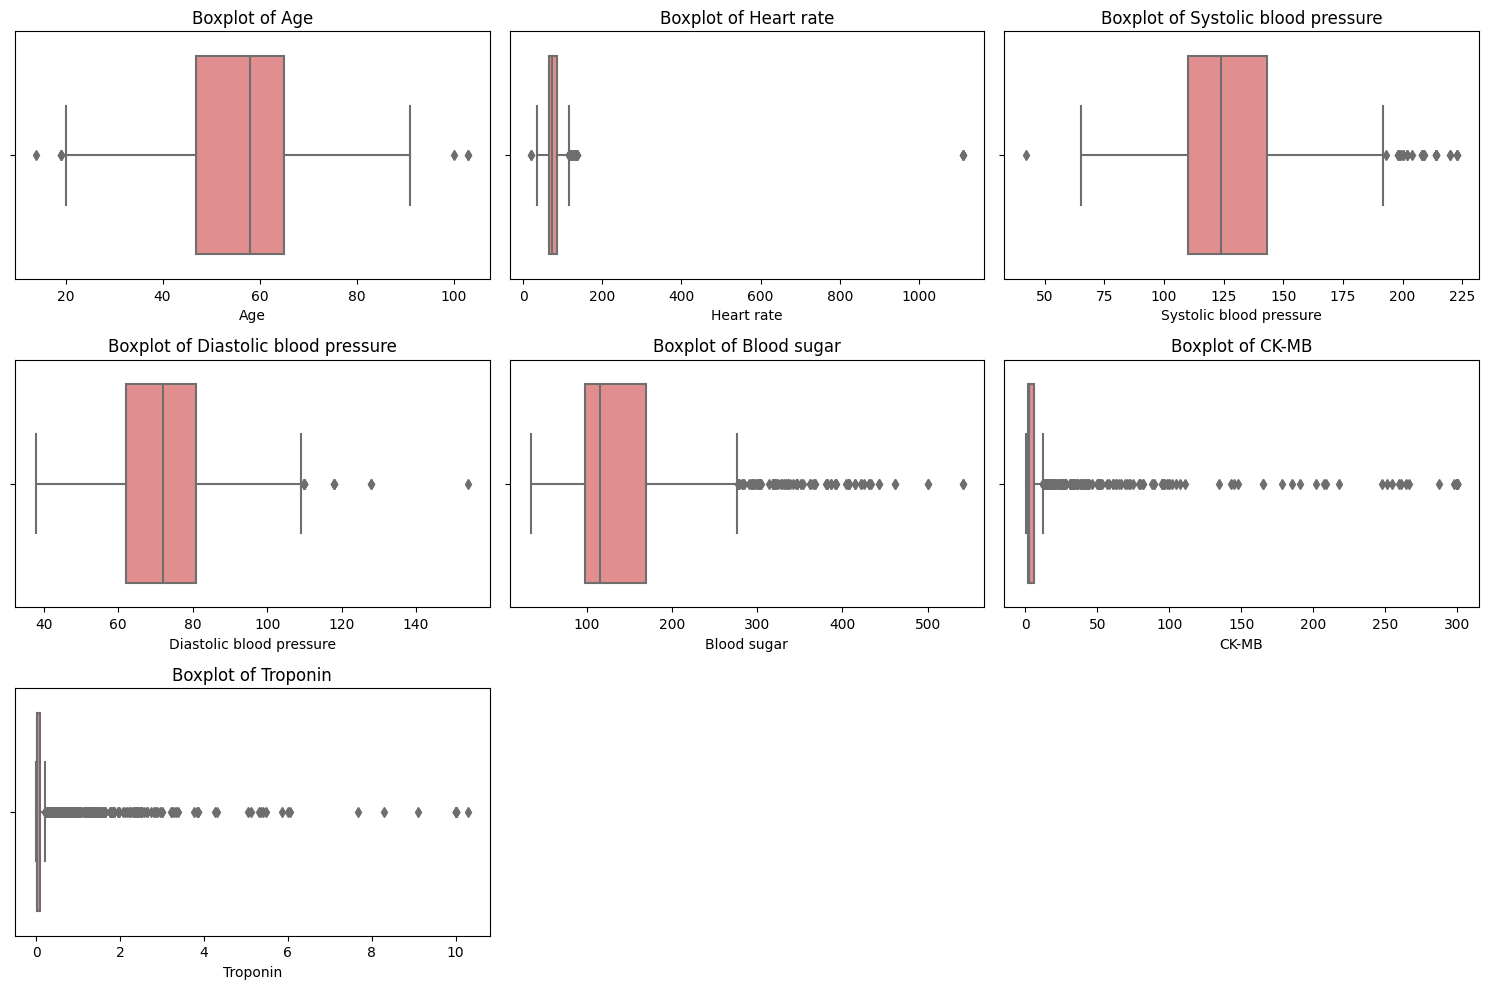

In [7]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder 
encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=encoder.fit_transform(df[col])

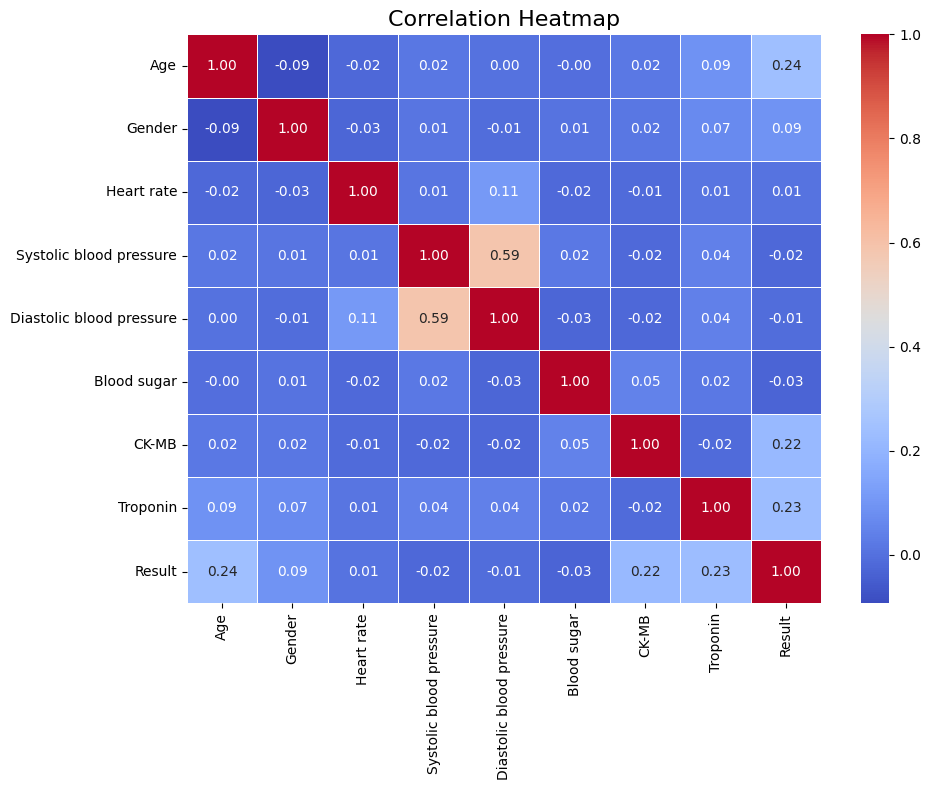

In [9]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Title
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


In [10]:
# Store original shape
print("Original Data Shape:", df.shape)

# Define numeric columns (excluding 'Result')
numeric_cols = df.drop(columns=['Result']).select_dtypes(include='number').columns

# Loop over each numeric column and filter out outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Print new shape
print("Data Shape After Removing Outliers:", df.shape)



Original Data Shape: (1319, 9)
Data Shape After Removing Outliers: (788, 9)


In [11]:
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
2,55,1,64,160,77,270.0,1.99,0.003,0
5,58,0,61,112,58,87.0,1.83,0.004,0
6,32,0,40,179,68,102.0,0.71,0.003,0
8,44,0,60,154,81,135.0,2.35,0.004,0
...,...,...,...,...,...,...,...,...,...
1311,85,1,112,115,69,114.0,2.19,0.062,1
1312,48,1,84,118,68,96.0,5.33,0.006,0
1313,86,0,40,179,68,147.0,5.22,0.011,0
1314,44,1,94,122,67,204.0,1.63,0.006,0


In [12]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df.drop(columns=['Age', 'Result', 'Gender']).columns
scaler= MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [13]:
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,0.3750,0.742188,0.671642,0.512295,0.127292,0.052632,0
2,55,1,0.3500,0.742188,0.582090,0.963115,0.143644,0.005263,0
5,58,0,0.3125,0.367188,0.298507,0.213115,0.129873,0.010526,0
6,32,0,0.0500,0.890625,0.447761,0.274590,0.033480,0.005263,0
8,44,0,0.3000,0.695312,0.641791,0.409836,0.174628,0.010526,0
...,...,...,...,...,...,...,...,...,...
1311,85,1,0.9500,0.390625,0.462687,0.323770,0.160857,0.315789,1
1312,48,1,0.6000,0.414062,0.447761,0.250000,0.431104,0.021053,0
1313,86,0,0.0500,0.890625,0.447761,0.459016,0.421637,0.047368,0
1314,44,1,0.7250,0.445312,0.432836,0.692623,0.112660,0.021053,0


In [14]:
x = df.drop (columns=['Result','Troponin'], axis=1)
y = df['Result']

In [15]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y, shuffle=True)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(x_train, y_train)

# Predict
y_pred_log = logreg.predict(x_test)

# Evaluation
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Results:
Accuracy: 0.6962025316455697
Confusion Matrix:
 [[72 17]
 [31 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75        89
           1       0.69      0.55      0.61        69

    accuracy                           0.70       158
   macro avg       0.69      0.68      0.68       158
weighted avg       0.70      0.70      0.69       158



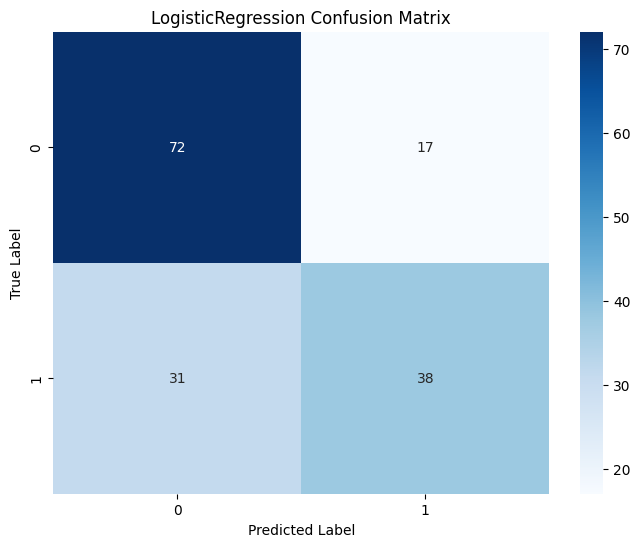

In [17]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.title("LogisticRegression Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict
y_pred_rf = rf_model.predict(x_test)

# Evaluation
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Results:
Accuracy: 0.7025316455696202
Confusion Matrix:
 [[73 16]
 [31 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76        89
           1       0.70      0.55      0.62        69

    accuracy                           0.70       158
   macro avg       0.70      0.69      0.69       158
weighted avg       0.70      0.70      0.70       158



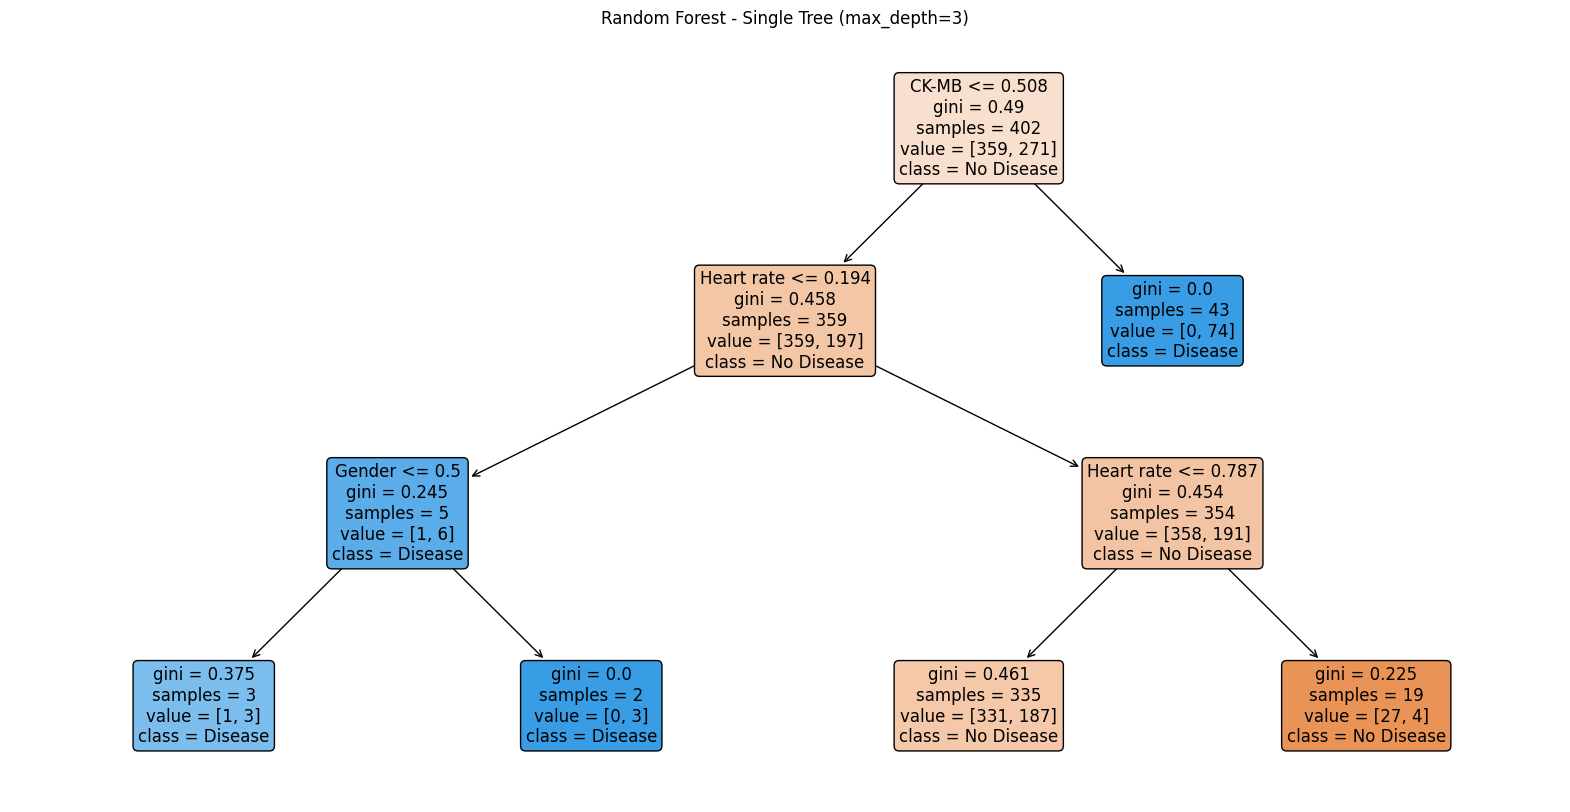

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 1: Train the model with max_depth=3
rf_model_vis = RandomForestClassifier(n_estimators=1, max_depth=3, random_state=42)
rf_model_vis.fit(x_train, y_train)

# Step 2: Plot the single tree
plt.figure(figsize=(20, 10))
plot_tree(rf_model_vis.estimators_[0], 
          feature_names=x_train.columns, 
          class_names=['No Disease', 'Disease'], 
          filled=True, 
          rounded=True,
          fontsize=12)

plt.title("Random Forest - Single Tree (max_depth=3)")
plt.show()


In [20]:
# Check training accuracy to compare with test accuracy
print("Random Forest Train Accuracy:", rf_model.score(x_train, y_train))
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))  # already printed, optional here

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.7025316455696202


In [21]:
from sklearn.model_selection import cross_val_score

# Run cross-validation on the entire dataset (x, y)
cv_scores = cross_val_score(rf_model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Average CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.6835443  0.70253165 0.69620253 0.59872611 0.70700637]
Average CV Accuracy: 0.6776021930178182


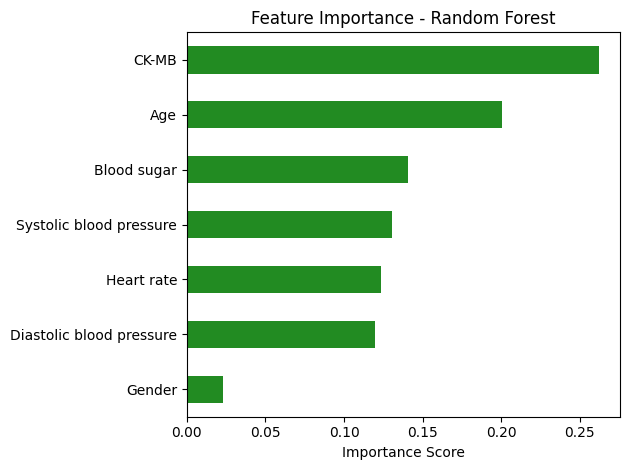

In [22]:
importances = pd.Series(rf_model.feature_importances_, index=x.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance - Random Forest', color='forestgreen')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

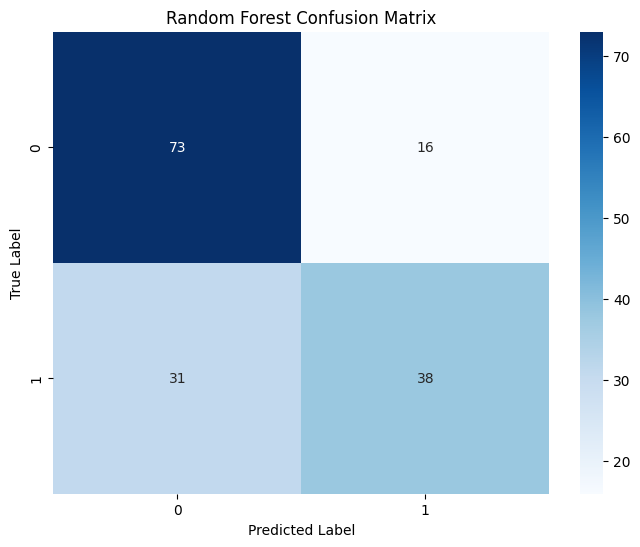

In [23]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [24]:
from sklearn.svm import SVC

# Initialize and train
svm_model = SVC(kernel='rbf')  # you can try 'linear' too
svm_model.fit(x_train, y_train)

# Predict
y_pred_svm = svm_model.predict(x_test)

# Evaluation
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.6645569620253164
Confusion Matrix:
 [[75 14]
 [39 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.84      0.74        89
           1       0.68      0.43      0.53        69

    accuracy                           0.66       158
   macro avg       0.67      0.64      0.63       158
weighted avg       0.67      0.66      0.65       158



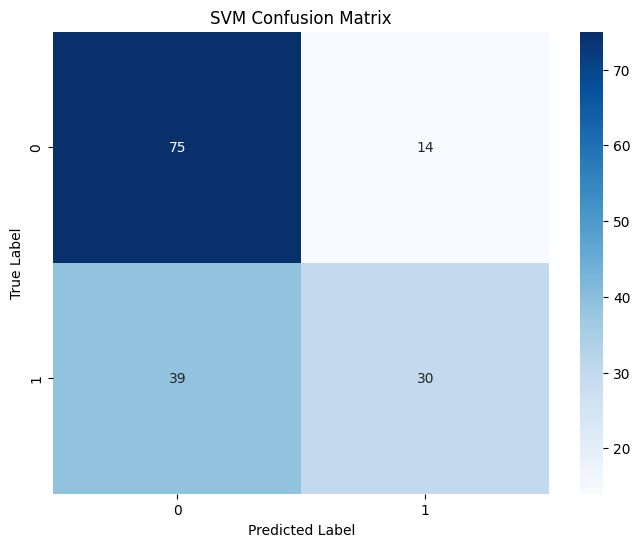

In [25]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model (you can try different values for n_neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(x_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(x_test)

# Evaluation
print("K-Nearest Neighbors (KNN) Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Results:
Accuracy: 0.6265822784810127
Confusion Matrix:
 [[68 21]
 [38 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.76      0.70        89
           1       0.60      0.45      0.51        69

    accuracy                           0.63       158
   macro avg       0.62      0.61      0.60       158
weighted avg       0.62      0.63      0.62       158



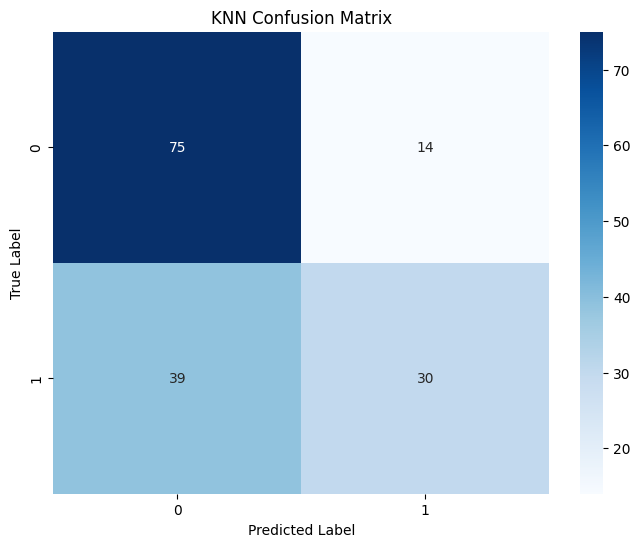

In [27]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [28]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
log_clf = LogisticRegression(max_iter=1000)
svm_clf = SVC(probability=True)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=5)  

# Create Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('svc', svm_clf),
    ('rf', rf_clf),
    ('knn', knn_clf)  
], voting='soft')

# Fit and predict
voting_clf.fit(x_train, y_train)
y_pred_voting = voting_clf.predict(x_test)

# Evaluate
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Classification Report:\n", classification_report(y_test, y_pred_voting))



Voting Classifier Accuracy: 0.7025316455696202
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.83      0.76        89
           1       0.71      0.54      0.61        69

    accuracy                           0.70       158
   macro avg       0.70      0.68      0.69       158
weighted avg       0.70      0.70      0.69       158



In [29]:

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5)  
}

# Dictionary to store accuracy
accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f'{name} Accuracy: {acc:.4f}')



Logistic Regression Accuracy: 0.6962
Random Forest Accuracy: 0.7025
SVM Accuracy: 0.6646
KNN Accuracy: 0.6266


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


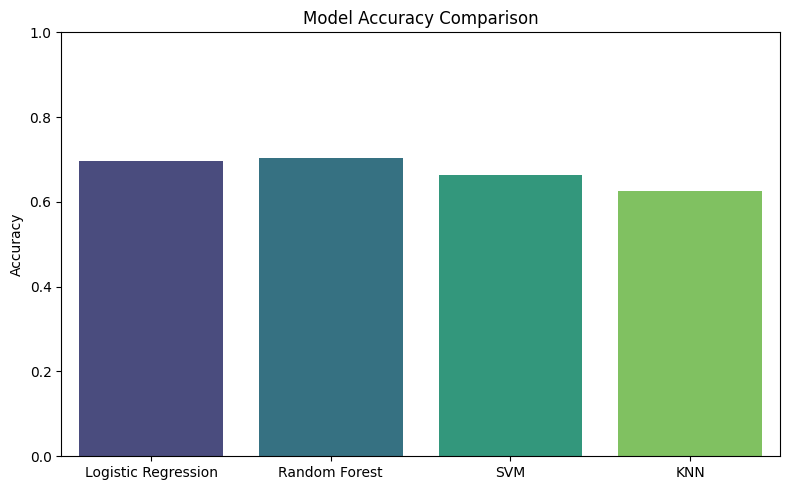

In [30]:
# Plot model comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
